# Importing code

In [1]:
from utils import *
from model import *

# creating DataBunch 

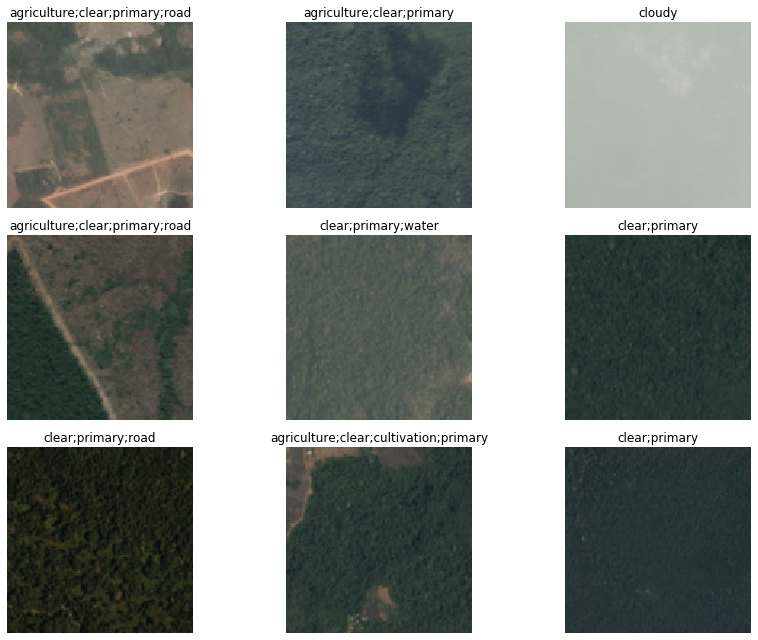

In [2]:
input_path = Path("./data")
data = preprocess_data(input_path)
data.show_batch(rows=3, figsize=(12,9))

# creating Models

In [3]:
archs = [
          models.resnet34,
          models.resnet50,     models.resnet101,
          models.resnet152,    models.densenet121,
          models.densenet161,  models.densenet169,
          models.densenet201
         ]
model = ensemble_model_trainer(archs)
model.build_learners(data)

/home/temp/anaconda3/envs/satellite/lib/python3.6/site-packages/torchvision/models/densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)


In [4]:
#model.load_model()

# Fine Tuning Models

## Training only last layers 

In [5]:
model.freeze()
model.lr_finder()

Model : resnet34


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Model : resnet50


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Model : resnet101


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Model : resnet152


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Model : densenet121


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Model : densenet161


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Model : densenet169


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Model : densenet201


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Model : resnet34
Model : resnet50
Model : resnet101
Model : resnet152
Model : densenet121
Model : densenet161
Model : densenet169
Model : densenet201


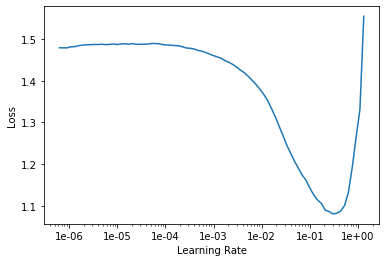

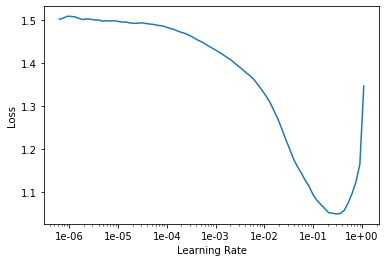

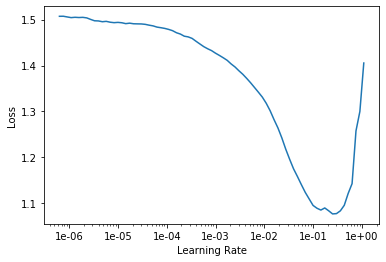

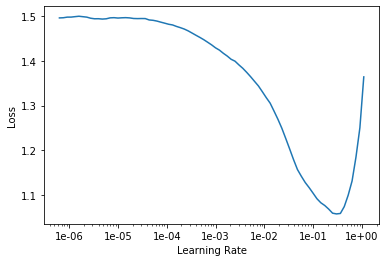

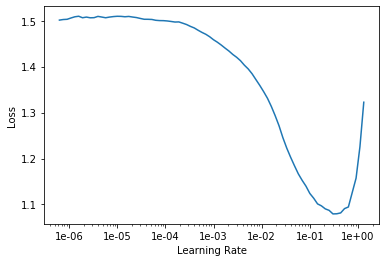

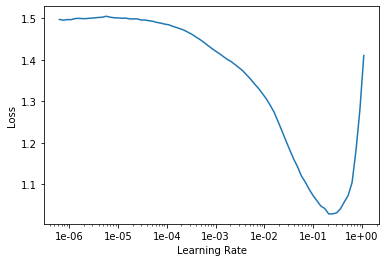

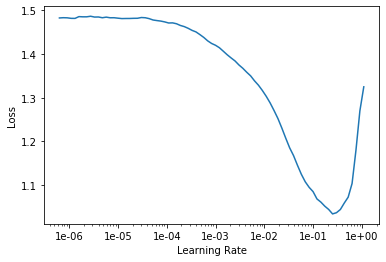

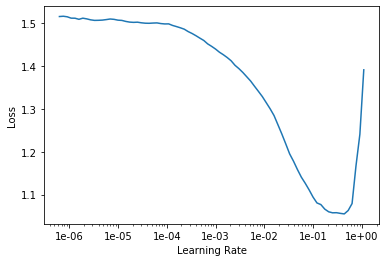

In [6]:
model.lr_finder_plot()

In [8]:
#choosing lr one order less than minimum
lrs = [slice(0.02),slice(0.03) ,slice(0.03),slice(0.03),slice(0.04), 
       slice(0.03),slice(0.03),slice(0.04)]
model.one_cycle_policy(lrs,5)

Model : resnet34


epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.259039,0.231847,0.949242,0.912275,00:41
1,0.270211,0.236519,0.940334,0.909943,00:41
2,0.244370,0.210474,0.950071,0.920255,00:41
3,0.218928,0.204346,0.953602,0.921626,00:41
4,0.218771,0.199571,0.952643,0.923887,00:41


Model : resnet50


epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.278386,0.255650,0.944643,0.905083,00:50
1,0.265322,0.244593,0.953225,0.909584,00:51
2,0.251237,0.219776,0.938960,0.916582,00:52
3,0.215926,0.197377,0.954402,0.925877,00:50
4,0.201012,0.191350,0.955317,0.927093,00:51


Model : resnet101


epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.263678,0.254938,0.949366,0.903271,01:50
1,0.274323,0.253151,0.948203,0.905048,01:40
2,0.243406,0.223674,0.955891,0.916443,01:17
3,0.215286,0.213481,0.955826,0.921326,01:18
4,0.208577,0.205735,0.955964,0.924869,01:17


Model : resnet152


epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.266260,0.248297,0.947826,0.907538,01:49
1,0.269549,0.226407,0.952861,0.917082,01:49
2,0.242354,0.272624,0.947150,0.918457,01:48
3,0.216472,0.214225,0.953130,0.922023,01:48
4,0.200557,0.228733,0.955659,0.926852,01:49


Model : densenet121


epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.276929,0.278042,0.937027,0.899169,01:03
1,0.279822,0.249817,0.948930,0.911653,01:02
2,0.250949,0.220422,0.954009,0.917437,01:02
3,0.217880,0.195349,0.956669,0.925967,01:01
4,0.201885,0.188796,0.956495,0.928149,01:03


Model : densenet161


epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.262391,0.235063,0.951829,0.913424,01:58
1,0.257702,0.233899,0.951909,0.913298,01:56
2,0.235599,0.282949,0.954489,0.913739,01:57
3,0.206434,0.232946,0.955027,0.925700,01:56
4,0.202375,0.206264,0.956327,0.928579,01:55


Model : densenet169


epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.261404,0.232312,0.950754,0.913553,01:17
1,0.258543,0.239768,0.947418,0.908925,01:16
2,0.237469,0.242188,0.956458,0.919583,01:16
3,0.200486,0.258817,0.958166,0.926054,01:17
4,0.201231,0.194323,0.956393,0.929015,01:16


Model : densenet201


epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.267750,0.246058,0.935712,0.908054,01:37
1,0.275951,0.342050,0.957439,0.908579,01:39
2,0.241814,3.032742,0.949998,0.917199,01:38
3,0.211967,0.410723,0.955731,0.924013,01:37
4,0.193574,0.373255,0.956676,0.927663,01:38


## Fine tuning whole models

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


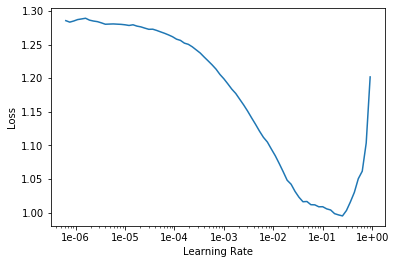

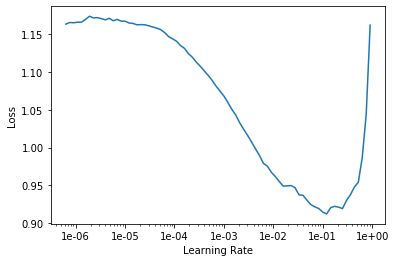

In [8]:
model.unfreeze()
model.lr_finder()
model.lr_finder_plot()

In [7]:
lrs = [slice(1e-06,1e-07) , slice(1e-05,1e-04)]
model.one_cycle_policy(lrs)

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.254946,0.229323,0.946176,0.911954,01:01


epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.237389,0.212124,0.949700,0.918927,01:06


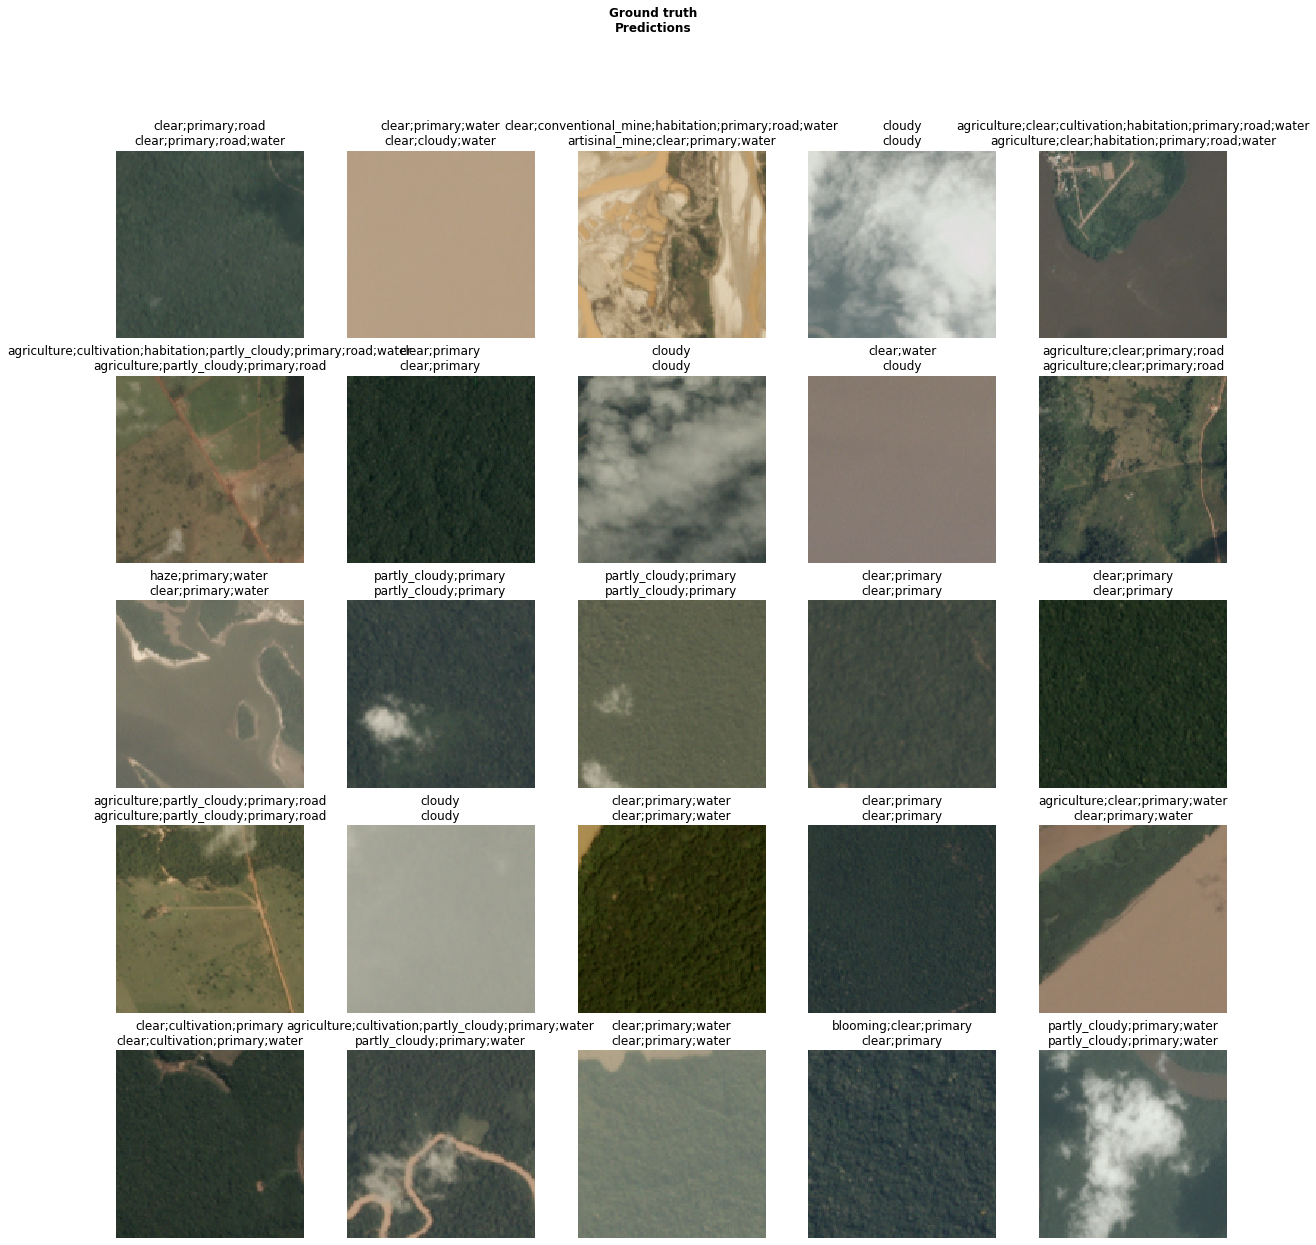

In [9]:
model.learners[1].show_results()

In [10]:
model.save_model()

data/models/resnet34.pth
data/models/resnet50.pth
data/models/resnet101.pth
data/models/resnet152.pth
data/models/densenet121.pth
data/models/densenet161.pth
data/models/densenet169.pth
data/models/densenet201.pth


## Loading saved Model

In [1]:
#you can start from here if you have saved model
from utils import *
from model import *
archs = [
          models.resnet34,
          models.resnet50,     models.resnet101,
          models.resnet152,    models.densenet121,
          models.densenet161,  models.densenet169,
          models.densenet201
         ]
input_path = Path("./data")
data = preprocess_data(input_path)
model = ensemble_model_trainer(archs)
model.build_learners(data)
model.load_model()



/home/temp/anaconda3/envs/satellite/lib/python3.6/site-packages/torchvision/models/densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)


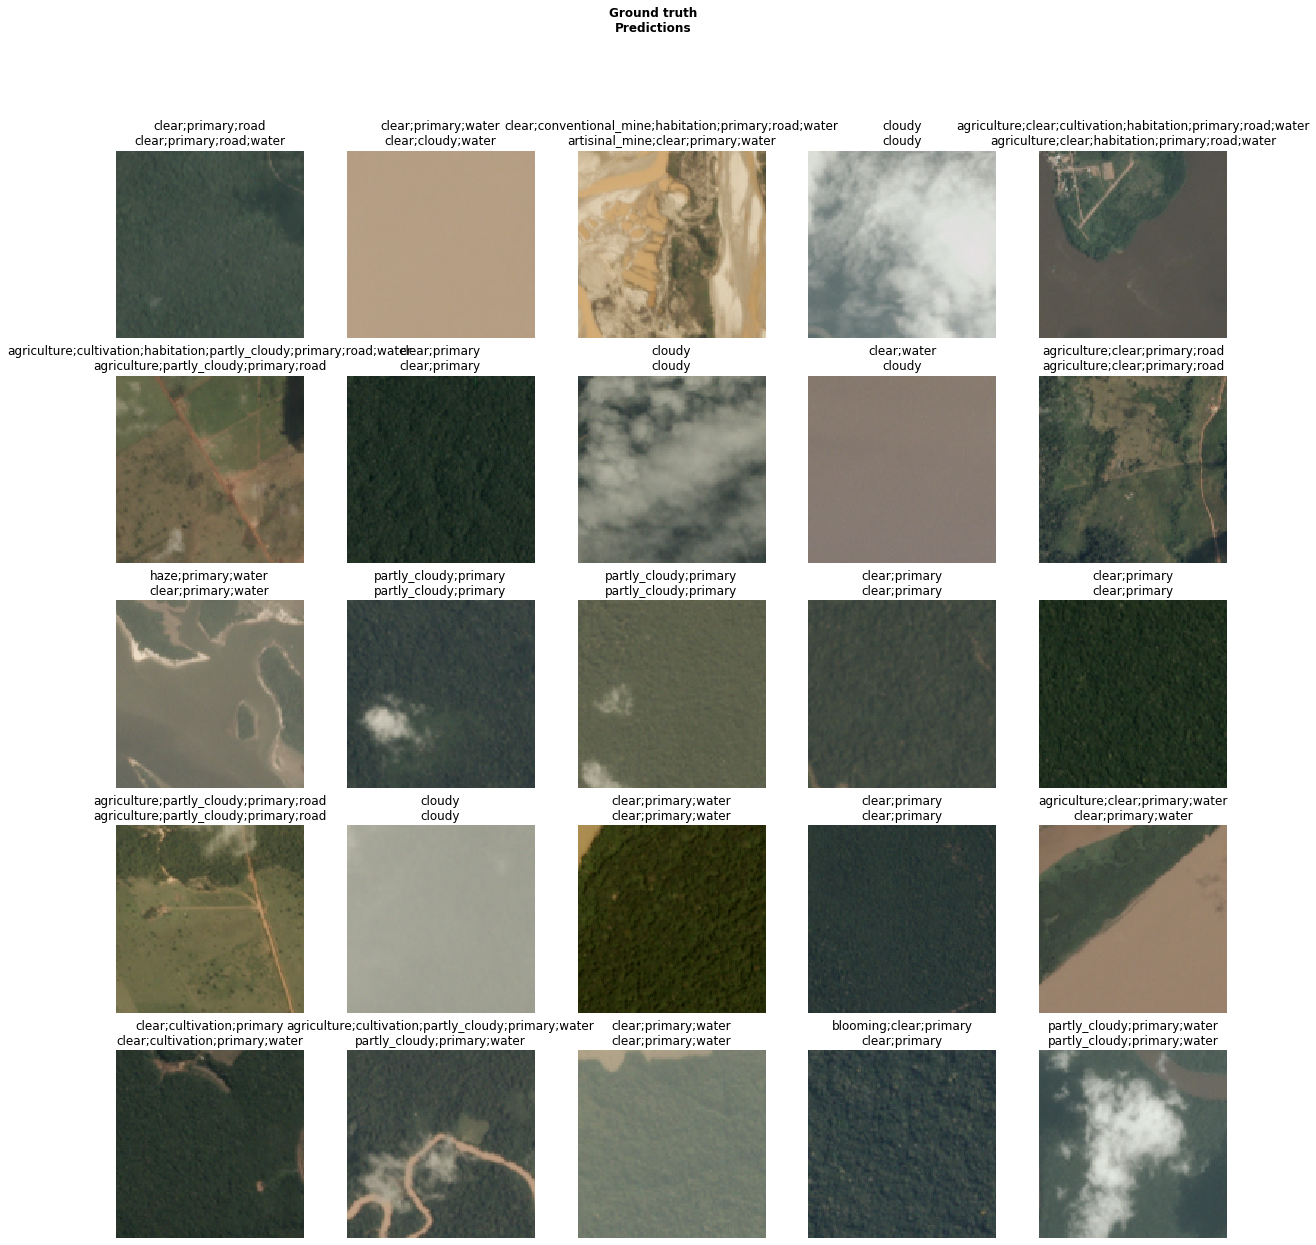

In [2]:
model.learners[1].show_results()

### extracts features from models , creates databunch for each label regressor and create a learner 

In [ ]:
model.create_regressors()

In [4]:
model.lr_finder_regressor()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


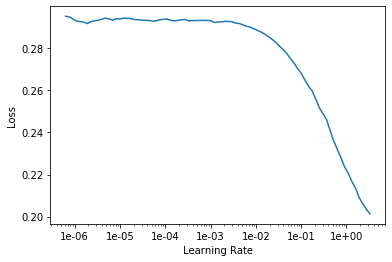

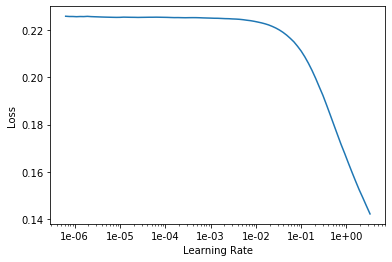

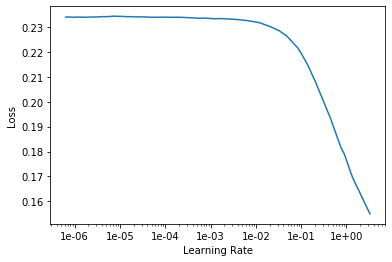

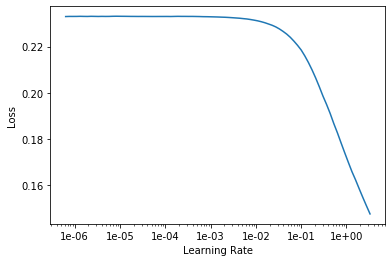

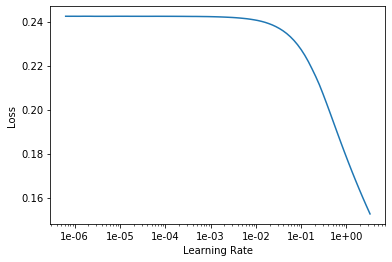

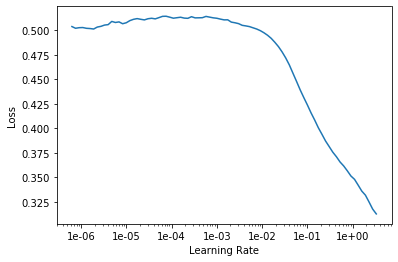

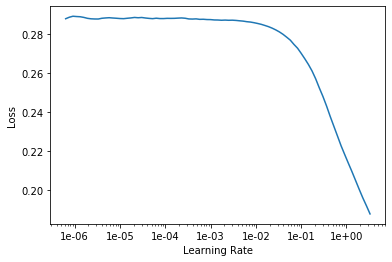

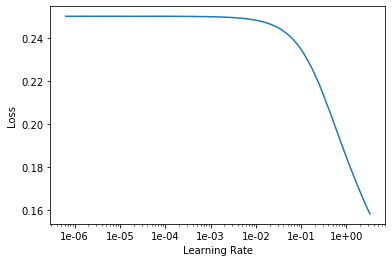

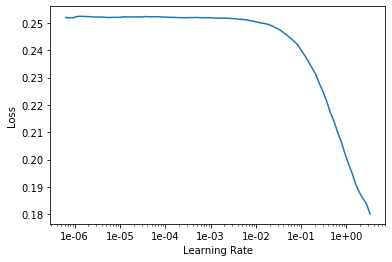

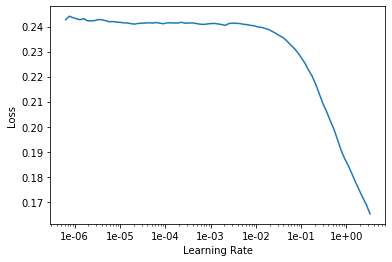

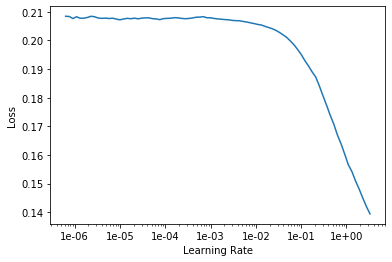

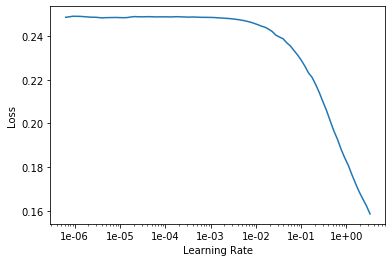

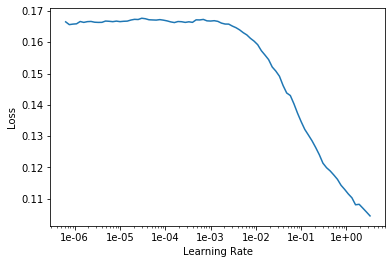

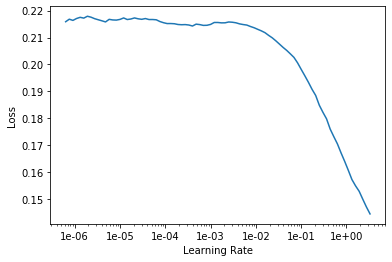

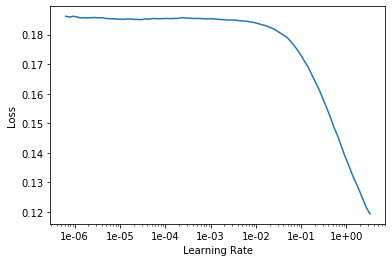

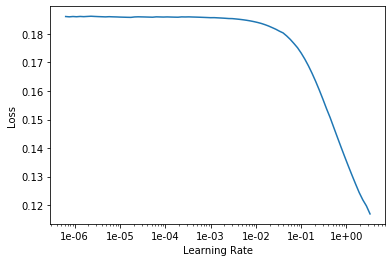

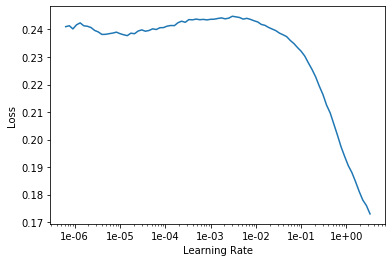

In [5]:
model.lr_finder_plot_regeressor()

In [18]:
slice(1)

slice(0.1, 0.9, None)

In [7]:
lrs = [slice(1) for i in range(17)]
model.one_cycle_policy_regressor(lrs,15)

epoch,train_loss,valid_loss,accuracy_thresh,time
0,0.069079,0.066239,0.300494,00:01
1,0.071124,0.065605,0.300494,00:01
2,0.073495,0.071112,0.300494,00:01
3,0.084957,0.071541,0.300494,00:01
4,0.090648,0.081164,0.300494,00:01
5,0.092046,0.076173,0.300494,00:01
6,0.087718,0.075251,0.300494,00:01
7,0.084841,0.067796,0.300494,00:01
8,0.079316,0.086789,0.300494,00:01
9,0.080953,0.067261,0.300494,00:01


epoch,train_loss,valid_loss,accuracy_thresh,time
0,0.003389,0.001447,0.005559,00:01
1,0.002158,0.001266,0.005559,00:01
2,0.004511,0.002509,0.005559,00:01
3,0.005770,0.005558,0.005559,00:01
4,0.009784,0.005574,0.005559,00:01
5,0.003858,0.003155,0.005559,00:01
6,0.003334,0.003034,0.005559,00:01
7,0.010086,0.005569,0.005559,00:01
8,0.011055,0.005566,0.005559,00:01
9,0.002162,0.002768,0.005559,00:01


epoch,train_loss,valid_loss,accuracy_thresh,time
0,0.017424,0.016806,0.023471,00:01
1,0.017784,0.023078,0.023471,00:01
2,0.021748,0.023355,0.023471,00:01
3,0.017106,0.023471,0.023471,00:01
4,0.019376,0.023459,0.023471,00:01
5,0.018801,0.023471,0.023471,00:01
6,0.019795,0.023471,0.023471,00:01
7,0.020056,0.023469,0.023471,00:01
8,0.021209,0.023421,0.023471,00:01
9,0.022272,0.023432,0.023471,00:01


epoch,train_loss,valid_loss,accuracy_thresh,time
0,0.008188,0.009208,0.009111,00:01
1,0.007487,0.008563,0.009111,00:01
2,0.008444,0.010259,0.009111,00:01
3,0.008214,0.009069,0.009111,00:01
4,0.006042,0.009100,0.009111,00:01
5,0.009351,0.009098,0.009111,00:01
6,0.008688,0.009016,0.009111,00:01
7,0.006928,0.009070,0.009111,00:01
8,0.005660,0.008692,0.009111,00:01
9,0.006987,0.008720,0.009111,00:01


epoch,train_loss,valid_loss,accuracy_thresh,time
0,0.001585,0.002511,0.002625,00:01
1,0.002628,0.002525,0.002625,00:01
2,0.001483,0.002302,0.002625,00:01
3,0.001746,0.002622,0.002625,00:01
4,0.001269,0.002616,0.002625,00:01
5,0.002188,0.002625,0.002625,00:01
6,0.002449,0.002123,0.002625,00:01
7,0.002090,0.002487,0.002625,00:01
8,0.002191,0.002544,0.002625,00:01
9,0.002172,0.002615,0.002625,00:01


epoch,train_loss,valid_loss,accuracy_thresh,time
0,0.038314,0.036211,0.708153,00:01
1,0.039398,0.045957,0.708153,00:01
2,0.038887,0.044760,0.708153,00:01
3,0.046571,0.055035,0.708153,00:01
4,0.050446,0.074753,0.708153,00:01
5,0.057954,0.056512,0.708153,00:01
6,0.053218,0.045881,0.708153,00:01
7,0.036783,0.038848,0.708153,00:01
8,0.042245,0.036320,0.708153,00:01
9,0.038732,0.036691,0.708153,00:01


epoch,train_loss,valid_loss,accuracy_thresh,time
0,0.011960,0.017471,0.055435,00:01
1,0.014158,0.013891,0.055435,00:01
2,0.047224,0.055447,0.055435,00:01
3,0.017454,0.017465,0.055435,00:01
4,0.016422,0.026635,0.055435,00:01
5,0.048170,0.055420,0.055435,00:01
6,0.049963,0.054970,0.055435,00:01
7,0.049878,0.055439,0.055435,00:01
8,0.016500,0.020642,0.055435,00:01
9,0.012682,0.014643,0.055435,00:01


epoch,train_loss,valid_loss,accuracy_thresh,time
0,0.001843,0.002664,0.003243,00:01
1,0.001058,0.002453,0.003243,00:01
2,0.001740,0.003229,0.003243,00:01
3,0.001391,0.002378,0.003243,00:01
4,0.002041,0.003243,0.003243,00:01
5,0.001753,0.002357,0.003243,00:01
6,0.001710,0.003235,0.003243,00:01
7,0.001550,0.002568,0.003243,00:01
8,0.000900,0.002385,0.003243,00:01
9,0.001985,0.002159,0.003243,00:01


epoch,train_loss,valid_loss,accuracy_thresh,time
0,0.064246,0.064121,0.111334,00:01
1,0.059703,0.056364,0.111334,00:01
2,0.071736,0.088476,0.111334,00:01
3,0.072975,0.059148,0.111334,00:01
4,0.077913,0.059782,0.111334,00:01
5,0.073183,0.064159,0.111334,00:01
6,0.084919,0.074561,0.111334,00:01
7,0.063051,0.057840,0.111334,00:01
8,0.065409,0.056307,0.111334,00:01
9,0.068512,0.056534,0.111334,00:01


epoch,train_loss,valid_loss,accuracy_thresh,time
0,0.033723,0.031569,0.086319,00:01
1,0.039246,0.037659,0.086319,00:01
2,0.042199,0.033163,0.086319,00:01
3,0.042058,0.036852,0.086319,00:01
4,0.042624,0.039767,0.086319,00:01
5,0.045632,0.036442,0.086319,00:01
6,0.054069,0.039622,0.086319,00:01
7,0.040789,0.035663,0.086319,00:01
8,0.040448,0.034233,0.086319,00:01
9,0.036592,0.034801,0.086319,00:01


epoch,train_loss,valid_loss,accuracy_thresh,time
0,0.029252,0.033585,0.067017,00:01
1,0.031637,0.031158,0.067017,00:01
2,0.032177,0.031018,0.067017,00:01
3,0.034710,0.033526,0.067017,00:01
4,0.038721,0.042926,0.067017,00:01
5,0.033952,0.031200,0.067017,00:01
6,0.055798,0.033658,0.067017,00:01
7,0.033988,0.040766,0.067017,00:01
8,0.060934,0.066961,0.067017,00:01
9,0.032415,0.033216,0.067017,00:01


epoch,train_loss,valid_loss,accuracy_thresh,time
0,0.020131,0.023517,0.179277,00:01
1,0.026226,0.022785,0.179277,00:01
2,0.024318,0.046242,0.179277,00:01
3,0.035507,0.031768,0.179277,00:01
4,0.027873,0.028669,0.179277,00:01
5,0.034684,0.037177,0.179277,00:01
6,0.026415,0.023743,0.179277,00:01
7,0.025610,0.024591,0.179277,00:01
8,0.025248,0.025805,0.179277,00:01
9,0.023462,0.026536,0.179277,00:01


epoch,train_loss,valid_loss,accuracy_thresh,time
0,0.028375,0.030070,0.924954,00:01
1,0.029219,0.032246,0.924954,00:01
2,0.033124,0.041124,0.924954,00:01
3,0.027494,0.028105,0.924954,00:01
4,0.029659,0.042454,0.924954,00:01
5,0.036495,0.036775,0.924954,00:01
6,0.027664,0.026108,0.924954,00:01
7,0.034831,0.042068,0.924954,00:01
8,0.027166,0.032530,0.924954,00:01
9,0.029886,0.034435,0.924954,00:01


epoch,train_loss,valid_loss,accuracy_thresh,time
0,0.049649,0.045829,0.201204,00:01
1,0.046726,0.046444,0.201204,00:01
2,0.050010,0.055236,0.201204,00:01
3,0.057984,0.065836,0.201204,00:01
4,0.055156,0.049210,0.201204,00:01
5,0.062364,0.057964,0.201204,00:01
6,0.059198,0.049901,0.201204,00:01
7,0.046742,0.048557,0.201204,00:01
8,0.050824,0.048287,0.201204,00:01
9,0.051745,0.047352,0.201204,00:01


epoch,train_loss,valid_loss,accuracy_thresh,time
0,0.005946,0.009445,0.011427,00:01
1,0.008113,0.011328,0.011427,00:01
2,0.007031,0.011384,0.011427,00:01
3,0.006708,0.009943,0.011427,00:01
4,0.007252,0.011412,0.011427,00:01
5,0.009414,0.011419,0.011427,00:01
6,0.008784,0.009958,0.011427,00:01
7,0.009301,0.011413,0.011427,00:01
8,0.008757,0.011422,0.011427,00:01
9,0.006994,0.011401,0.011427,00:01


epoch,train_loss,valid_loss,accuracy_thresh,time
0,0.003922,0.005863,0.006022,00:01
1,0.004381,0.005916,0.006022,00:01
2,0.003506,0.005976,0.006022,00:01
3,0.003872,0.005920,0.006022,00:01
4,0.004502,0.006019,0.006022,00:01
5,0.006204,0.006019,0.006022,00:01
6,0.004374,0.005971,0.006022,00:01
7,0.005293,0.005957,0.006022,00:01
8,0.006501,0.005997,0.006022,00:01
9,0.004763,0.006011,0.006022,00:01


epoch,train_loss,valid_loss,accuracy_thresh,time
0,0.054244,0.050798,0.188542,00:01
1,0.052318,0.052131,0.188542,00:01
2,0.057942,0.061080,0.188542,00:01
3,0.056992,0.079131,0.188542,00:01
4,0.066040,0.075113,0.188542,00:01
5,0.061517,0.058483,0.188542,00:01
6,0.069857,0.054511,0.188542,00:01
7,0.062125,0.053169,0.188542,00:01
8,0.059339,0.052123,0.188542,00:01
9,0.059621,0.074411,0.188542,00:01


In [4]:
model.save_regressors()